# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# from config import api_key
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


4560e014c81d2a2224a6de163866895a


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# pprint(url)
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url)
        city_weather_json = city_weather.json()
        # print(city_weather)
    #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp =  city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json[ "sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | nguigmi
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | salinopolis
Processing Record 5 of Set 1 | fort mcmurray
Processing Record 6 of Set 1 | cannonvale
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | ukiah
Processing Record 9 of Set 1 | camana
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | bodo
Processing Record 12 of Set 1 | neiafu
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | nikolayevsk-on-amure
Processing Record 15 of Set 1 | carauari
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | gadzhiyevo
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | coahuayana de hidalgo
Processing Record 22 of Set 1 | jamesto

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()


City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,4.06,87,100,2.42,GS,1724860270
1,nguigmi,14.2495,13.1092,34.68,37,80,5.74,NE,1724860044
2,atafu village,-8.5421,-172.5159,28.14,76,9,7.39,TK,1724859769
3,salinopolis,-0.6136,-47.3561,28.92,71,49,6.26,BR,1724860273
4,fort mcmurray,56.7268,-111.3810,15.77,88,100,1.54,CA,1724859675


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,4.06,87,100,2.42,GS,1724860270
1,nguigmi,14.2495,13.1092,34.68,37,80,5.74,NE,1724860044
2,atafu village,-8.5421,-172.5159,28.14,76,9,7.39,TK,1724859769
3,salinopolis,-0.6136,-47.3561,28.92,71,49,6.26,BR,1724860273
4,fort mcmurray,56.7268,-111.3810,15.77,88,100,1.54,CA,1724859675


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

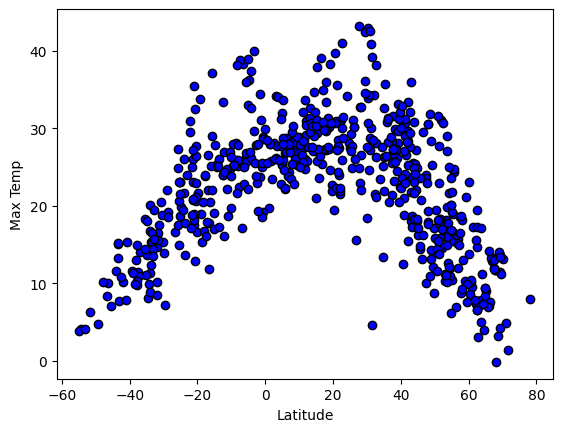

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

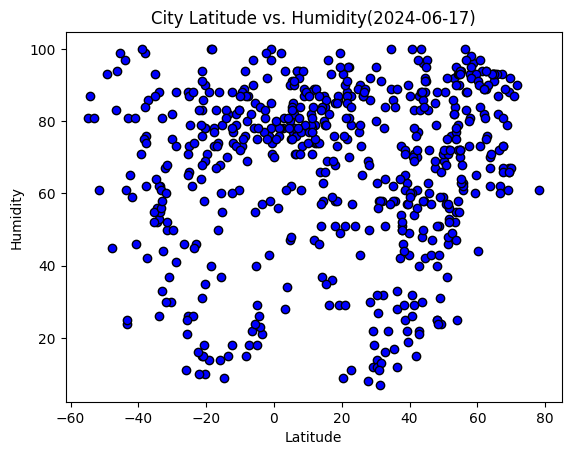

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity(2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

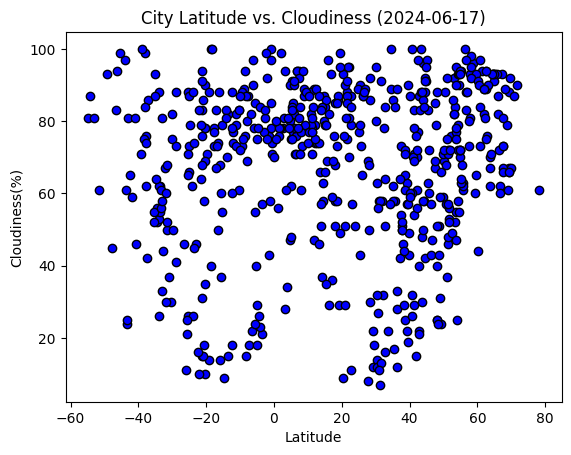

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

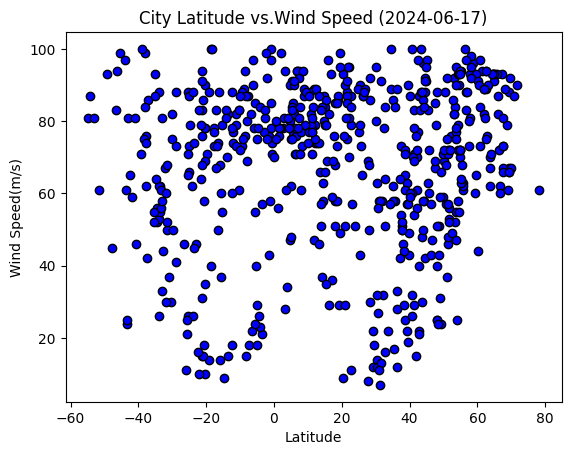

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs.Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nguigmi,14.2495,13.1092,34.68,37,80,5.74,NE,1724860044
4,fort mcmurray,56.7268,-111.3810,15.77,88,100,1.54,CA,1724859675
7,ukiah,39.1502,-123.2078,28.13,63,0,0.00,US,1724860099
9,aasiaat,68.7098,-52.8699,3.15,79,100,2.56,GL,1724859876
10,bodo,67.2800,14.4050,13.30,93,75,9.26,NO,1724860281


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,4.06,87,100,2.42,GS,1724860270
2,atafu village,-8.5421,-172.5159,28.14,76,9,7.39,TK,1724859769
3,salinopolis,-0.6136,-47.3561,28.92,71,49,6.26,BR,1724860273
5,cannonvale,-20.2833,148.7000,20.66,90,10,2.92,AU,1724860275
6,carnarvon,-24.8667,113.6333,19.89,79,1,6.52,AU,1724859800


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.46444725470419107


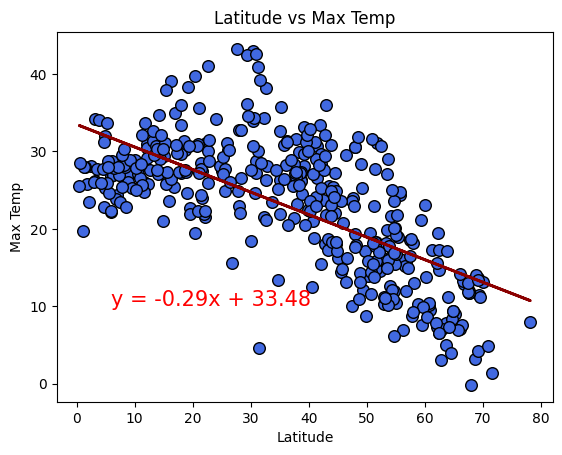

In [19]:
# Linear regression on Northern Hemisphere
# # Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")


# Show plot
plt.show()

The r^2-value is: 0.6043585063410345


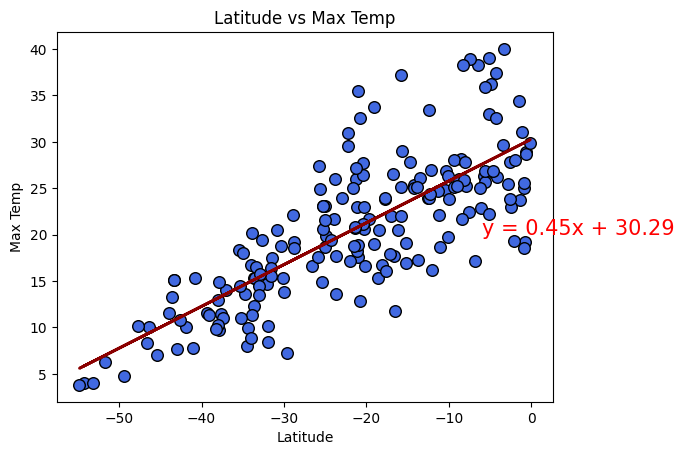

In [32]:
# Linear regression on Southern Hemisphere
# # Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-6,20),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")


# Show plot
plt.show()

**Discussion about the linear relationship:
Based on the analysis of the scatter plots and the observed linear relationships, it can be concluded that there is a strong correlation between latitude and maximum temperature in both the Northern and Southern Hemispheres.

Northern Hemisphere: As latitude increases (moving northward), the maximum temperature generally decreases.
Southern Hemisphere: As latitude increases (moving southward), the maximum temperature generally increases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.46444725470419107


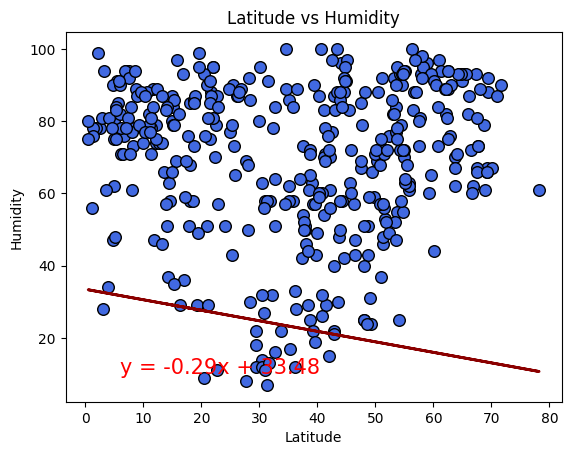

In [20]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")


# Show plot
plt.show()

The r^2-value is: 0.6043585063410345


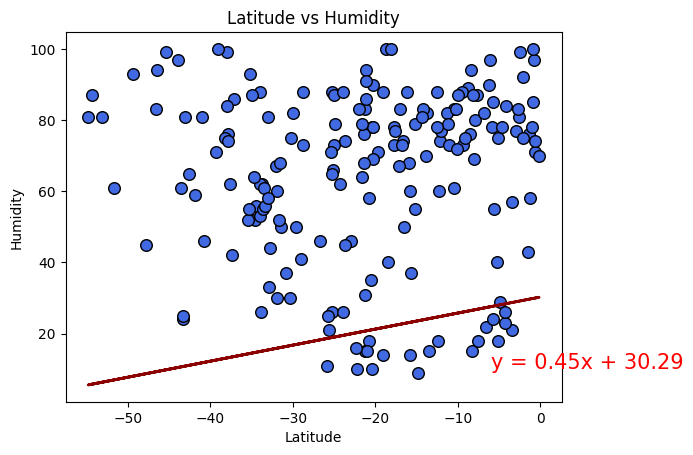

In [36]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")


# Show plot
plt.show()



**Discussion about the linear relationship:** Based on the analysis of the scatter plots and the observed relationship between latitude and humidity, there is no strong linear correlation between these two variables in the Southern Hemisphere and Northern Hemisphere. While latitude can influence temperature, which in turn affects humidity, other factors such as proximity to oceans, wind patterns, and local geography play a more significant role in determining humidity levels. 


### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.46444725470419107


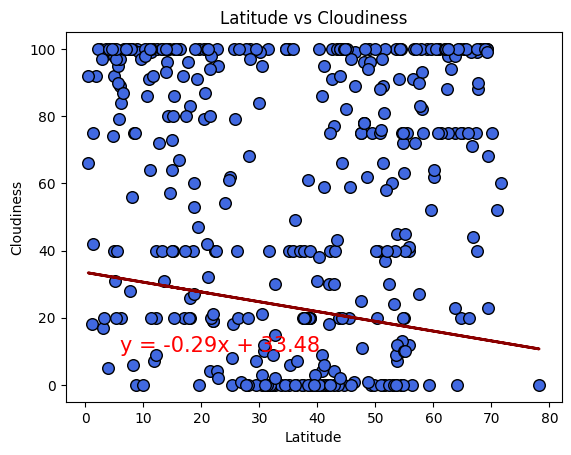

In [21]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")


# Show plot
plt.show()

The r^2-value is: 0.6043585063410345


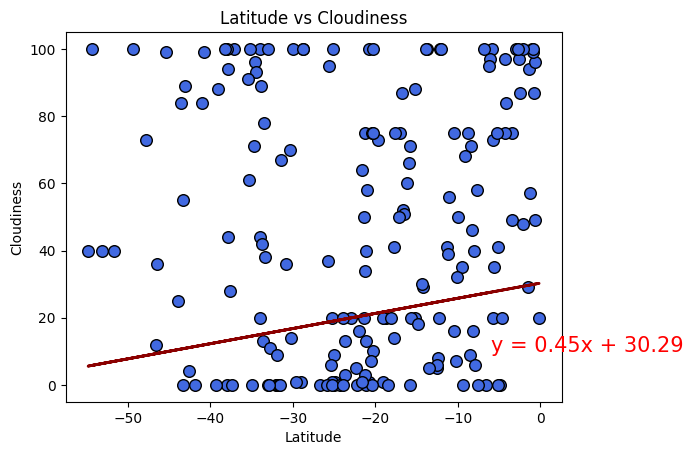

In [39]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")


# Show plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere:  A strong linear correlation between latitude and cloudiness is not consistently observed. Mid-latitude regions often have higher cloud cover, while polar regions may have lower levels due to colder temperatures.

Southern Hemisphere: Similar to the Northern Hemisphere, the relationship between latitude and cloudiness is not straightforward. Factors like ocean currents and atmospheric circulation patterns can influence cloud cover in specific regions.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.46444725470419107


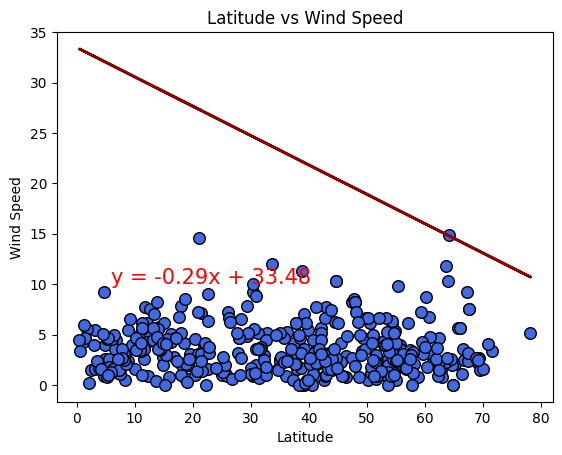

In [22]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")


# Show plot
plt.show()

The r^2-value is: 0.6043585063410345


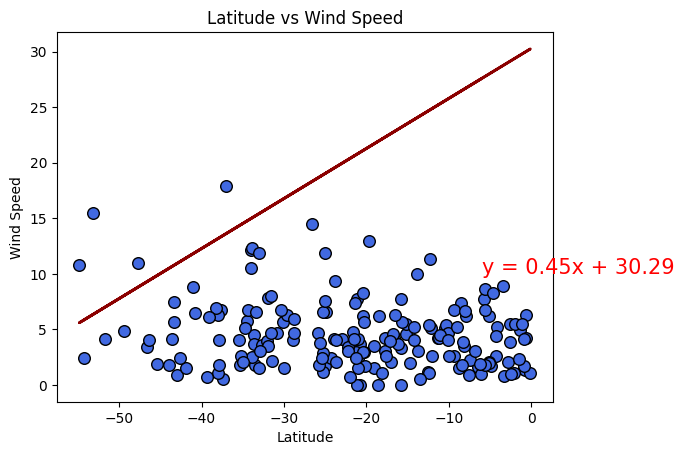

In [40]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(-6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")


# Show plot
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and wind speed is influenced by various factors, and a strong linear correlation is not observed in either the Northern or Southern Hemisphere. While latitude can indirectly affect wind patterns through its influence on temperature, factors like global atmospheric circulation, local weather systems